<a href="https://colab.research.google.com/github/haniahhaq/CS7641-assignment-1/blob/master/DT_STROKE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score


from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import os

from sklearn.metrics import classification_report,confusion_matrix,f1_score
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score

In [5]:
data = pd.read_csv('full_data.csv')
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [6]:
data_clean = data[data['age']>25]

In [7]:
data_clean = data_clean.replace({'gender': {'Female': 0, 'Male': 1}})
data_clean['stroke'].value_counts().to_frame().T

,0,1
stroke,3486,246


In [8]:

data_clean = data_clean.replace({'ever_married': {'Yes': 1, 'No': 0}})

In [9]:
data2 = pd.get_dummies(data_clean, columns=["work_type", "Residence_type","smoking_status"], prefix=["work", "residence","smoke"])

In [10]:
target = 'stroke'
X = data2.loc[:,data2.columns!=target]
y = data2.loc[:,data2.columns==target]

In [11]:
import seaborn as sns
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

X.shape, y.shape
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, shuffle=True)

In [12]:
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier()
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
y_pred_gini = clf_gini.predict(X_test)
accuracy_score(y_test, y_pred_gini)

0.9161290322580645

In [14]:
from sklearn.metrics import accuracy_score, f1_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9161


In [15]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([1, 0, 1, ..., 1, 0, 0])

In [16]:
print('Training-set accuracy score:{0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score:1.0000


In [17]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9161


[Text(0.40842746607083746, 0.9736842105263158, 'X[1] <= 55.014\ngini = 0.5\nsamples = 5577\nvalue = [2767, 2810]'),
 Text(0.12711540052962594, 0.9210526315789473, 'X[1] <= 45.007\ngini = 0.296\nsamples = 1952\nvalue = [1600, 352]'),
 Text(0.04890764647467726, 0.868421052631579, 'X[1] <= 37.035\ngini = 0.138\nsamples = 1110\nvalue = [1027, 83]'),
 Text(0.013240648791790799, 0.8157894736842105, 'X[5] <= 80.711\ngini = 0.031\nsamples = 576\nvalue = [567, 9]'),
 Text(0.010592519033432638, 0.7631578947368421, 'X[5] <= 80.575\ngini = 0.084\nsamples = 206\nvalue = [197, 9]'),
 Text(0.007944389275074478, 0.7105263157894737, 'X[5] <= 76.262\ngini = 0.066\nsamples = 204\nvalue = [197, 7]'),
 Text(0.005296259516716319, 0.6578947368421053, 'gini = 0.0\nsamples = 157\nvalue = [157, 0]'),
 Text(0.010592519033432638, 0.6578947368421053, 'X[5] <= 76.66\ngini = 0.254\nsamples = 47\nvalue = [40, 7]'),
 Text(0.005296259516716319, 0.6052631578947368, 'X[6] <= 28.586\ngini = 0.375\nsamples = 4\nvalue = [1,

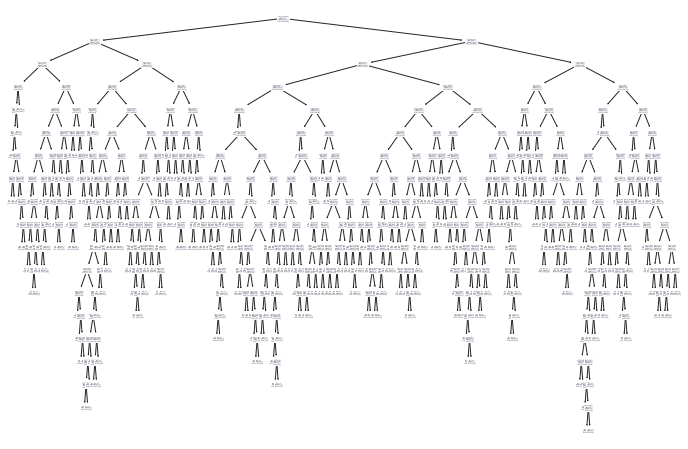

In [18]:

from matplotlib.pyplot import *
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 


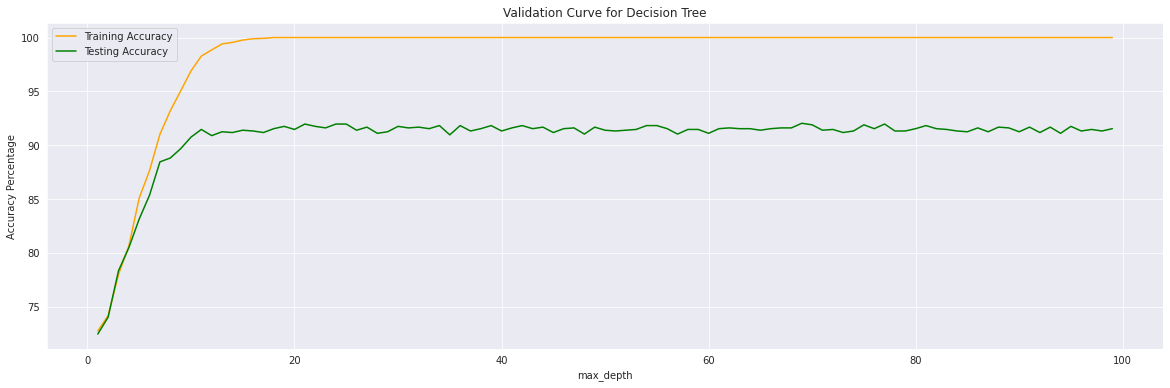

In [19]:
# CHANGING MAX_DEPTH
score_train=[]
score_test=[]

for i in range(1,100):
    dtree_md = DecisionTreeClassifier(criterion= "gini", max_depth=i)
    dtree_md.fit(X_train,y_train)
    
    score_train.append(dtree_md.score(X_train,y_train)*100)
    score_test.append(dtree_md.score(X_test,y_test)*100)
    
score_train_array=np.asarray(score_train)
score_test_array=np.asarray(score_test)
plt.figure(figsize=(20,6))
plt.title("Validation Curve for Decision Tree")
plt.plot(range(1,100),score_train_array,color='orange', label="Training Accuracy")
plt.plot(range(1,100),score_test_array,color='green',label="Testing Accuracy")

plt.legend()
plt.xlabel('max_depth')
plt.ylabel('Accuracy Percentage')
plt.show()

In [20]:
path = clf_gini.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.00000000e+00 8.92056661e-05 1.10683871e-04 1.14105009e-04
 1.34480904e-04 1.39860140e-04 1.61377084e-04 1.61377084e-04
 1.63007156e-04 1.63715883e-04 1.64365549e-04 1.64365549e-04
 1.64365549e-04 1.66500167e-04 1.67354014e-04 1.68101130e-04
 1.68760350e-04 1.69870615e-04 1.69870615e-04 1.70769402e-04
 1.71157514e-04 1.71157514e-04 1.71836710e-04 1.72135557e-04
 1.72411415e-04 1.72411415e-04 1.72904019e-04 1.73124842e-04
 1.73704501e-04 1.73874300e-04 1.74825175e-04 1.75859643e-04
 1.77029277e-04 1.77989431e-04 1.79307872e-04 1.80968130e-04
 1.85948904e-04 2.13376367e-04 2.15169446e-04 2.17342875e-04
 2.24134840e-04 2.25013800e-04 2.28617536e-04 2.30538692e-04
 2.36832306e-04 2.39077162e-04 2.39077162e-04 2.39077162e-04
 2.39077162e-04 2.39077162e-04 2.39077162e-04 2.39077162e-04
 2.39077162e-04 2.39077162e-04 2.56154102e-04 2.64071593e-04
 2.68961807e-04 2.68961807e-04 2.68961807e-04 2.68961807e-04
 2.68961807e-04 2.68961807e-04 2.68961807e-04 2.68961807e-04
 2.84615669e-04 2.849908

In [21]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [22]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

In [23]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(accuracy_score(y_train,y_train_pred))
    test_acc.append(accuracy_score(y_test,y_test_pred))


In [24]:
from sklearn.metrics import plot_confusion_matrix
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.020)
clf_.fit(X_train,y_train)
y_train_pred = clf_.predict(X_train)
y_test_pred = clf_.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.7913978494623656

[Text(0.5714285714285714, 0.9166666666666666, 'X[1] <= 55.014\ngini = 0.5\nsamples = 5577\nvalue = [2767, 2810]'),
 Text(0.42857142857142855, 0.75, 'gini = 0.296\nsamples = 1952\nvalue = [1600, 352]'),
 Text(0.7142857142857143, 0.75, 'X[14] <= 0.5\ngini = 0.437\nsamples = 3625\nvalue = [1167, 2458]'),
 Text(0.5714285714285714, 0.5833333333333334, 'X[13] <= 0.5\ngini = 0.378\nsamples = 2781\nvalue = [705, 2076]'),
 Text(0.42857142857142855, 0.4166666666666667, 'X[12] <= 0.5\ngini = 0.29\nsamples = 2229\nvalue = [393, 1836]'),
 Text(0.2857142857142857, 0.25, 'X[15] <= 0.5\ngini = 0.169\nsamples = 1852\nvalue = [173, 1679]'),
 Text(0.14285714285714285, 0.08333333333333333, 'gini = 0.0\nsamples = 1588\nvalue = [0, 1588]'),
 Text(0.42857142857142855, 0.08333333333333333, 'gini = 0.452\nsamples = 264\nvalue = [173, 91]'),
 Text(0.5714285714285714, 0.25, 'gini = 0.486\nsamples = 377\nvalue = [220, 157]'),
 Text(0.7142857142857143, 0.4166666666666667, 'gini = 0.491\nsamples = 552\nvalue = [312

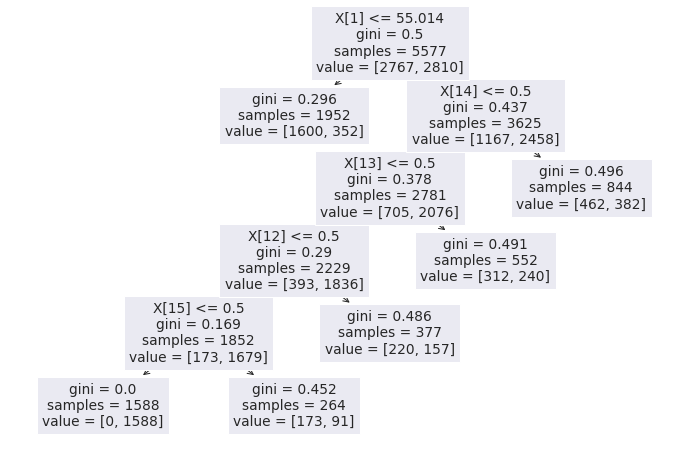

In [25]:

from matplotlib.pyplot import *
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_.fit(X_train, y_train)) 


In [26]:
print('Training set score: {:.4f}'.format(clf_.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_.score(X_test, y_test)))

Training set score: 0.7809
Test set score: 0.7914


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KMeans
from sklearn import datasets
from sklearn.model_selection import learning_curve
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=10)
sizes, training_scores, testing_scores = learning_curve(clf_gini, X, y, cv=10, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))

In [28]:
train_mean = np.mean(training_scores, axis=1)
train_std = np.std(training_scores, axis=1)

test_mean = np.mean(testing_scores, axis=1)
test_std = np.std(testing_scores, axis=1)

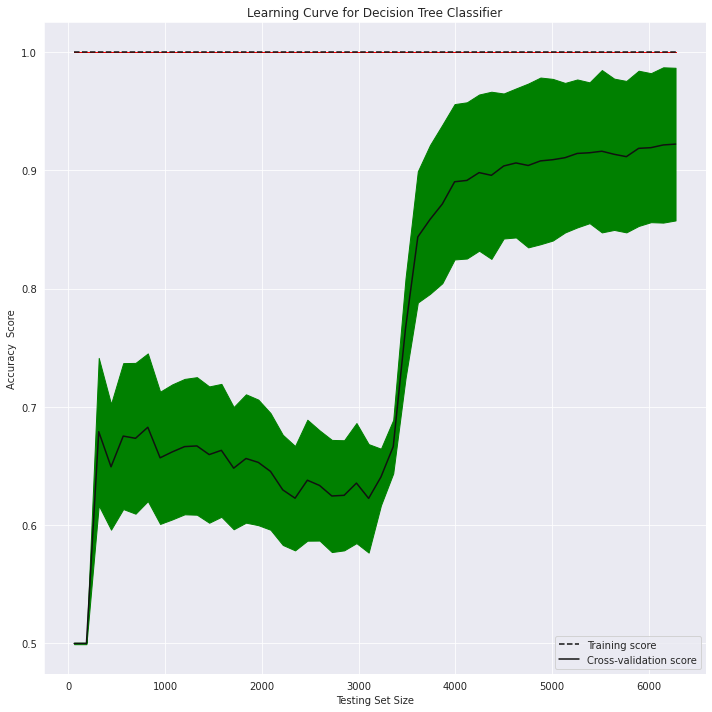

In [29]:
plt.subplots(1, figsize=(10,10))
plt.plot(sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(sizes, test_mean, color="#111111", label="Cross-validation score")
plt.fill_between(sizes, train_mean - train_std, train_mean + train_std, color="red")
plt.fill_between(sizes, test_mean - test_std, test_mean + test_std, color="green")

plt.title("Learning Curve for Decision Tree Classifier")
plt.xlabel("Testing Set Size"), plt.ylabel("Accuracy  Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

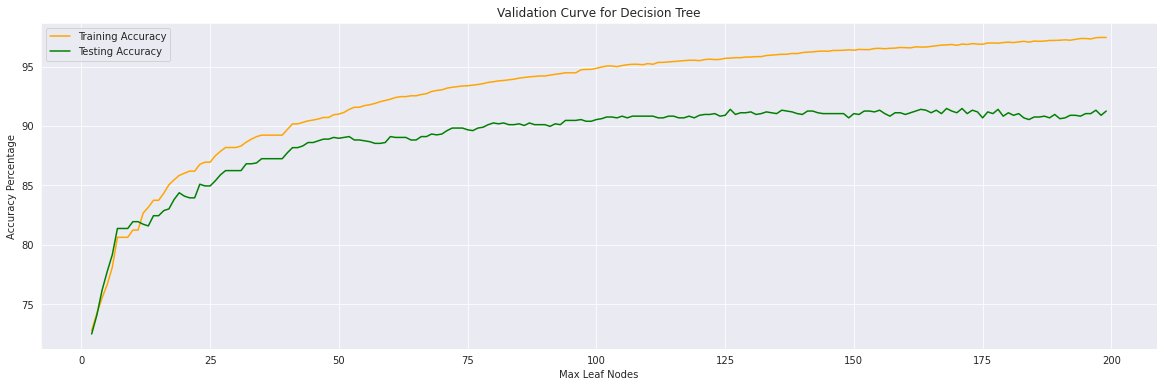

In [30]:
# CHANGING MAX_DEPTH
score_train=[]
score_test=[]

for i in range(2,200):
    dtree_md = DecisionTreeClassifier(criterion= "gini", max_leaf_nodes=i)
    dtree_md.fit(X_train,y_train)
    
    score_train.append(dtree_md.score(X_train,y_train)*100)
    score_test.append(dtree_md.score(X_test,y_test)*100)
    
score_train_array=np.asarray(score_train)
score_test_array=np.asarray(score_test)
plt.figure(figsize=(20,6))
plt.title("Validation Curve for Decision Tree")
plt.plot(range(2,200),score_train_array,color='orange', label="Training Accuracy")
plt.plot(range(2,200),score_test_array,color='green',label="Testing Accuracy")

plt.legend()
plt.xlabel('Max Leaf Nodes')
plt.ylabel('Accuracy Percentage')
plt.show()

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
#making the instance
model= DecisionTreeClassifier(random_state=1234)
#Hyper Parameters Set
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          "max_depth":[1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40],
          'random_state':[123]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#Learning
model1.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:",model1.best_params_)
#Prediction
prediction=model1.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

Best Hyper Parameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'random_state': 123}
Accuracy: 0.921146953405018
Confusion Metrix:
 [[665  56]
 [ 54 620]]


In [32]:
best_clf = model1.best_estimator_


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KMeans
from sklearn import datasets
from sklearn.model_selection import learning_curve
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=10)
sizes, training_scores, testing_scores = learning_curve(best_clf, X, y, cv=10, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))

In [34]:
train_mean = np.mean(training_scores, axis=1)
train_std = np.std(training_scores, axis=1)

test_mean = np.mean(testing_scores, axis=1)
test_std = np.std(testing_scores, axis=1)

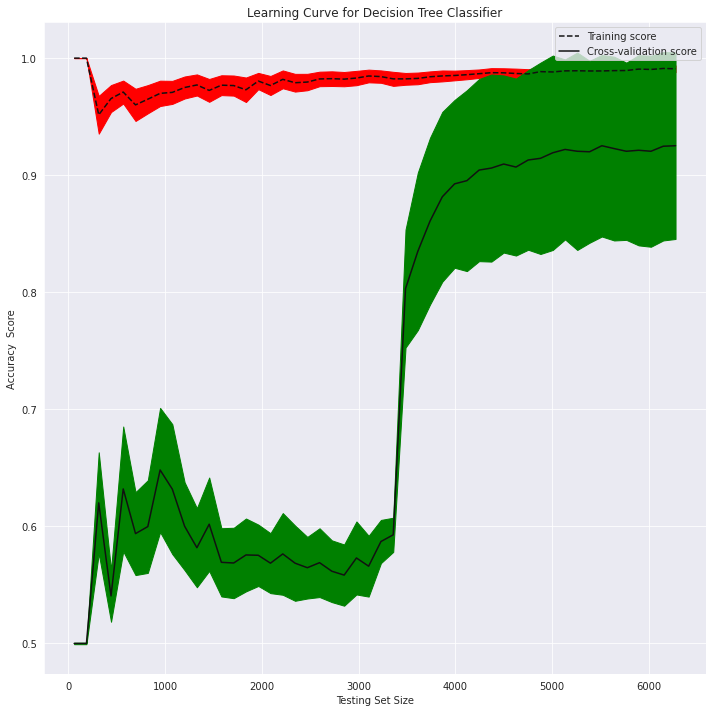

In [35]:
plt.subplots(1, figsize=(10,10))
plt.plot(sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(sizes, test_mean, color="#111111", label="Cross-validation score")
plt.fill_between(sizes, train_mean - train_std, train_mean + train_std, color="red")
plt.fill_between(sizes, test_mean - test_std, test_mean + test_std, color="green")

plt.title("Learning Curve for Decision Tree Classifier")
plt.xlabel("Testing Set Size"), plt.ylabel("Accuracy  Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve

 
# Setting the range for the parameter (from 1 to 10)
parameters = {
    'max_depth': [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100], 
}
 
# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
train_score, test_score = validation_curve(best_clf, X, y,
                                       param_name = "max_depth",
                                       param_range = parameters['max_depth'],
                                        cv = 5, scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)

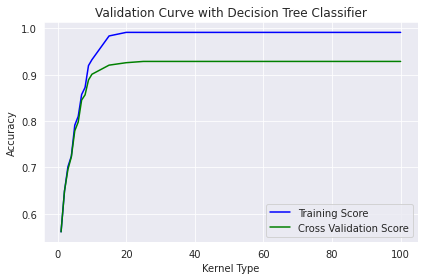

In [37]:
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameters['max_depth'], mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameters['max_depth'], mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with Decision Tree Classifier")
plt.xlabel("Kernel Type")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [38]:
best_clf = DecisionTreeClassifier(criterion='gini', max_depth=20, random_state=1)

best_clf.fit(X_train, y_train)
y_test_pred = best_clf.predict(X_test)
test_score = accuracy_score(y_test, y_test_pred)
print('%.4f' % test_score)

0.9154


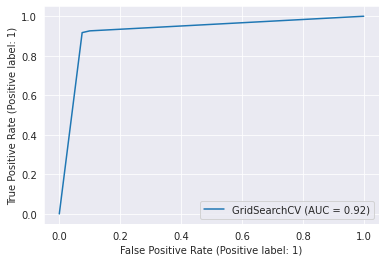

In [39]:
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score
plot_roc_curve(model1, X_test, y_test, response_method='auto');

In [43]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       719
           1       0.92      0.92      0.92       676

    accuracy                           0.92      1395
   macro avg       0.92      0.92      0.92      1395
weighted avg       0.92      0.92      0.92      1395



In [44]:
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       719
           1       0.91      0.92      0.91       676

    accuracy                           0.92      1395
   macro avg       0.92      0.92      0.92      1395
weighted avg       0.92      0.92      0.92      1395



In [45]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       719
           1       0.91      0.92      0.91       676

    accuracy                           0.92      1395
   macro avg       0.92      0.92      0.92      1395
weighted avg       0.92      0.92      0.92      1395



plot_precision_recall_curve(model1, X_test_scaled, y_test);

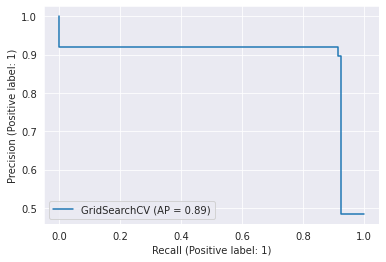

In [46]:
plot_precision_recall_curve(model1, X_test, y_test);

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve

 
# Setting the range for the parameter (from 1 to 10)
parameters = {
    'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100], 
}
 
# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
train_score, test_score = validation_curve(best_clf, X, y,
                                       param_name = "min_samples_leaf",
                                       param_range = parameters['min_samples_leaf'],
                                        cv = 5, scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)

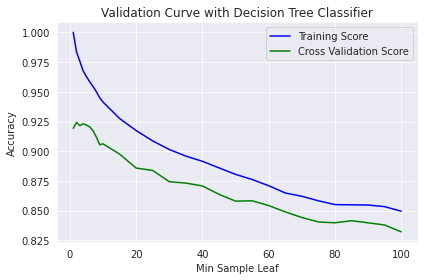

In [53]:
# Plot mean accuracy scores for training and testing scores
plt.plot(parameters['min_samples_leaf'], mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameters['min_samples_leaf'], mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with Decision Tree Classifier")
plt.xlabel("Min Sample Leaf")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()